<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/PRI_Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cargar Funciones y bases de datos**

In [1]:
#https://drive.google.com/file/d/1_7TT83TiGF1Dnr--2iAfJqNj_Q3se_AL/view?usp=sharing
#https://drive.google.com/open?id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
#id del archivo: 1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
FILEID = "1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19

--2020-05-31 15:33:49--  https://docs.google.com/uc?export=download&confirm=&id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
Resolving docs.google.com (docs.google.com)... 74.125.195.138, 74.125.195.102, 74.125.195.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-1g-docs.googleusercontent.com/docs/securesc/qt7mj72piiupel1ibb70mcg6fm97i18h/ndfm77l7lhnchne0njktq7vdgl9hettf/1590939225000/11146100322577758036/06159664041647312529Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download [following]
--2020-05-31 15:33:49--  https://doc-0o-1g-docs.googleusercontent.com/docs/securesc/qt7mj72piiupel1ibb70mcg6fm97i18h/ndfm77l7lhnchne0njktq7vdgl9hettf/1590939225000/11146100322577758036/06159664041647312529Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download
Resolving doc-0o-1g-docs.googleusercontent.com (doc-0o-1g-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to 

**Añadir Carpeta de funciones y bases de datos**

In [0]:
import os
import sys
Path='/content/PRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

**Cargar librerias**

In [0]:
import cv2
import time
import shutil
import numpy as np
import math as math
import pandas as pd
import scipy.io as sio
from sklearn import datasets
from joblib import dump,load
from main_functions import *
from google.colab import files
import matplotlib.pyplot as plt
from scipy.spatial import distance
from datetime import date, datetime
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.base import BaseEstimator, TransformerMixin, ClusterMixin
from sklearn.metrics import accuracy_score,confusion_matrix,jaccard_score

## **Sin ruido**
**Validacion de la metodologia**

**Happy**

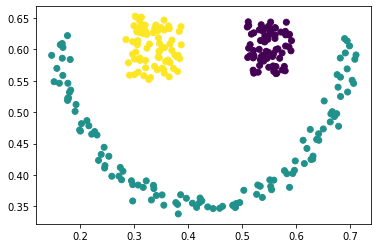

In [0]:
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
plt.scatter(happy[:,0],happy[:,1],c=labels_happy)

**Crear conjunto de train y test**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    happy, labels_happy, test_size=0.2, stratify=labels_happy)

# **Punto Fijo**

**Reduccion con Kmeans**

el tiempo requerido fue:2.2801971435546875sg
Ari: 0.35925576609791654 y accuracy: 0.7037037037037037


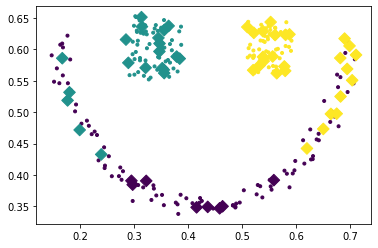

In [0]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, nn=5, sigma_initial=25,reduction_='Kmeans')
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

****Reduccion con Spectral Clustering****

el tiempo requerido fue:2.07704758644104sg
Ari: 1.0 y accuracy: 1.0


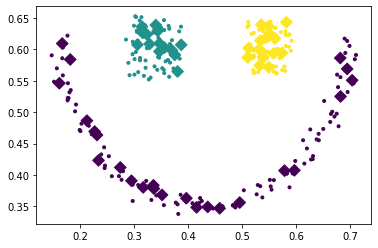

In [0]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, nn=5, sigma_initial=25,reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:0.8921277523040771sg
Ari: 1.0 y accuracy: 1.0


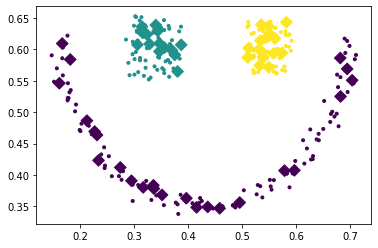

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=4, sigma_initial=35,reduction_='SC',gamma_=1000,n_clusters=3)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Adam**

el tiempo requerido fue:0.9094944000244141sg
Ari: 1.0 y accuracy: 1.0


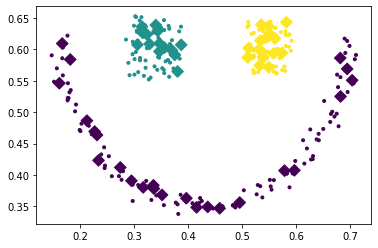

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=20,optimization='Adam',reduction_='SC',gamma_=1000)
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D',s=68)
Rari_SGDA=adjusted_rand_score(y_test,labels_pre_SGDA)
Racc_SGDA=accuracy_score(y_test,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))

**Nadam**

el tiempo requerido fue:0.8795266151428223sg
Ari: 1.0 y accuracy: 1.0


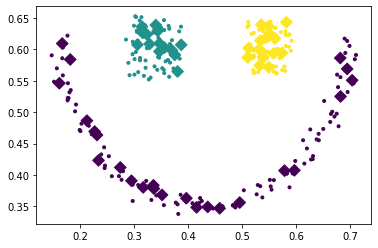

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=30,learning_rate=0.002,optimization='Nadam',reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D',s=68)
Rari_SGDA=adjusted_rand_score(y_test,labels_pre_SGDA)
Racc_SGDA=accuracy_score(y_test,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))

**Kmeans**

el tiempo requerido fue:0.06073617935180664sg
Ari: 0.3866953538407862 y accuracy: 0.7407407407407407


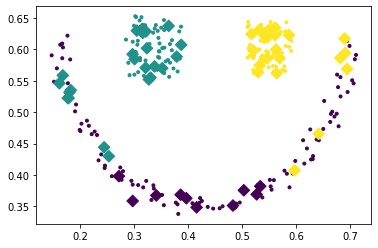

In [0]:
t = time.time()
p = Kmeans( n_clusters_=3)
p.fit(X_train, y_train)
labels_pre_Km= p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_Km, marker='D',s=68)
Rari_Km=adjusted_rand_score(y_test,labels_pre_Km)
Racc_Km=accuracy_score(y_test,labels_pre_Km)
print('Ari: '+str(Rari_Km)+' y'+' accuracy: '+str(Racc_Km))

**Spectral Clustering**

el tiempo requerido fue:0.063720703125sg
Ari: 1.0 y accuracy: 1.0


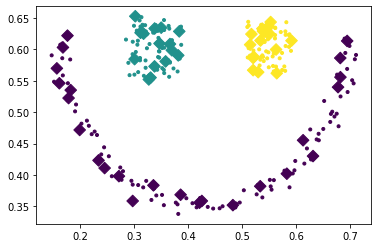

In [0]:
t = time.time()
p = SC(n_clusters_=3, gamma_=500, n_neighbors_=5, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

## **Con ruido**


**happy**

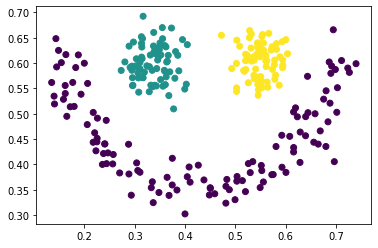

In [0]:
# Set a target SNR
target_snr_db =30
# Calculate signal power and convert to dB 
avg_happy = np.mean(happy)
avg_db = 10 * np.log10(avg_happy)
# Calculate noise according to [2] then convert to watts
avg_db = avg_db - target_snr_db
noise_avg_watts = 10 ** (avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts),happy.shape)
noisy_happy=happy+noise_volts
plt.scatter(noisy_happy[:,0],noisy_happy[:,1],c=labels_happy)

**Prueba**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    noisy_happy, labels_happy, test_size=0.2, stratify=labels_happy)

**FP**

/content/PRI/main_functions.py:309: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:309: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


el tiempo requerido fue:0.9715518951416016sg
Ari: 0.6887346502936464 y accuracy: 0.8888888888888888


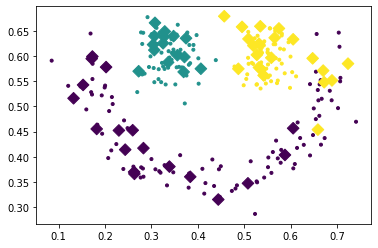

In [0]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, nn=5, sigma_initial=3,reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:0.9296224117279053sg
Ari: 1.0 y accuracy: 1.0


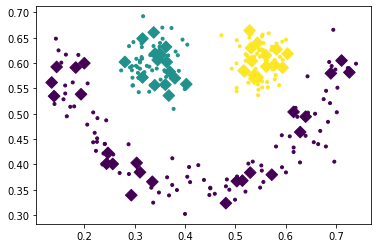

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=15, sigma_initial=40,reduction_='SC',n_clusters=3,gamma_=500)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Spectral clustering**

el tiempo requerido fue:0.06790423393249512sg
Ari: 0.6485702445089101 y accuracy: 0.8703703703703703


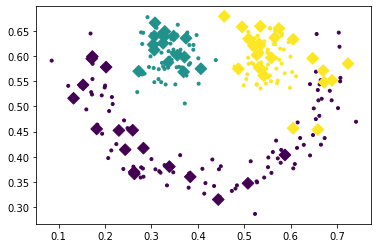

In [0]:
t = time.time()
p = SC(n_clusters_=3, gamma_=1000, n_neighbors_=5, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

**moons**

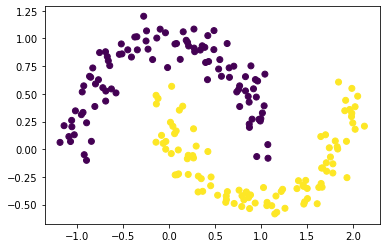

In [0]:

moons,labels_moons = datasets.make_moons(n_samples=200)
# Set a target SNR
target_snr_db =15
# Calculate signal power and convert to dB 
avg_moons = np.mean(moons)
avg_db = 10 * np.log10(avg_moons)
# Calculate noise according to [2] then convert to watts
avg_db = avg_db - target_snr_db
noise_avg_watts = 10 ** (avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts),moons.shape)
noisy_moons=moons+noise_volts
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=labels_moons)

**Prueba**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    noisy_moons, labels_moons, test_size=0.2, stratify=labels_moons)

**FP**

el tiempo requerido fue:0.8672313690185547sg
Ari: 0.8999407933688574 y accuracy: 0.975


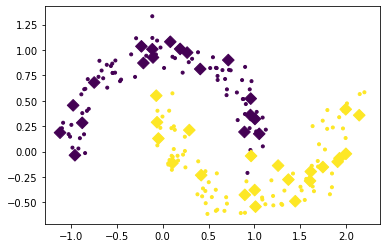

In [0]:
t = time.time()
p = PRI(lambda_=2, n_clusters=2, nn=3, sigma_initial=15,reduction_='SC')
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:0.6399497985839844sg
Ari: 0.8999407933688574 y accuracy: 0.975


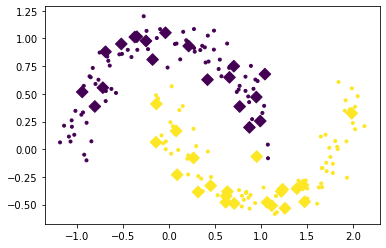

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=2, sigma_initial=30,learning_rate=0.01,reduction_='SC',n_clusters=2,gamma_=100)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Spectral clustering**

el tiempo requerido fue:0.13807153701782227sg
Ari: 1.0 y accuracy: 1.0


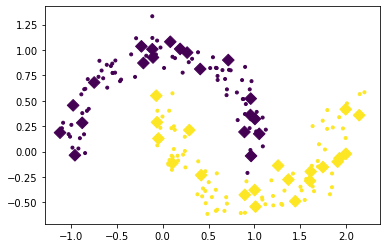

In [0]:
t = time.time()
p = SC(n_clusters_=2, gamma_=100, n_neighbors_=1, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

**Happy**

**SGD+Kmeans**

In [0]:
n_clusters=3
steps =[[('rep', MiniBatchPRI())]] 
   
parameters =[ {'rep__lambda_':[7,35,70],'rep__sigma_initial':[20,40],'rep__learning_rate':[0.001,0.005,0.01,0.05],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['Kmeans'],'rep__optimization':['Nadam',None]}]

In [0]:
n=[5,15,30]

for k in n:
  # Set a target SNR
  target_snr_db =k
  # Calculate signal power and convert to dB 
  avg_happy = np.mean(happy)
  avg_db = 10 * np.log10(avg_happy)
  # Calculate noise according to [2] then convert to watts
  avg_db = avg_db - target_snr_db
  noise_avg = 10 ** (avg_db / 10)
  # Generate an sample of white noise
  noise_ = np.random.normal(0, np.sqrt(noise_avg),happy.shape)
  noisy_happy=happy+noise_

  for i in range(len(steps)):

    meth_name = ['SGDKmeans'+str(k)+'db']
    name='/content/PRI/happy' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    jacc=np.zeros(Niter)
    puri=np.zeros(Niter)
    Nc = len(np.unique(labels_happy))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(noisy_happy,labels_happy,test_size=0.2, stratify=labels_happy)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=-1)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'jacc':jacc,
        'puri':puri,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

**SGD+SC**

In [0]:
n_clusters=3
steps =[[('rep',SC())],
        [('rep',Kmeans())],  
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[1,50,100,500],'rep__n_neighbors_':[5],'rep__nn_':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[7,35,70],'rep__sigma_initial':[20,40],'rep__learning_rate':[0.001,0.005,0.01,0.05],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[1,50,100,500],'rep__optimization':['Nadam',None]}]

In [0]:
n=[5,15,30]

for k in n:
  # Set a target SNR
  target_snr_db =k
  # Calculate signal power and convert to dB 
  avg_happy = np.mean(happy)
  avg_db = 10 * np.log10(avg_happy)
  # Calculate noise according to [2] then convert to watts
  avg_db = avg_db - target_snr_db
  noise_avg = 10 ** (avg_db / 10)
  # Generate an sample of white noise
  noise_ = np.random.normal(0, np.sqrt(noise_avg),happy.shape)
  noisy_happy=happy+noise_

  for i in range(len(steps)):
    #meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db', 'FP'+str(k)+'db','SGD'+str(k)+'db']
    meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db','SGD'+str(k)+'db']
    name='/content/PRI/happy' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    jacc=np.zeros(Niter)
    puri=np.zeros(Niter)
    Nc = len(np.unique(labels_happy))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(noisy_happy,labels_happy,test_size=0.2, stratify=labels_happy)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=-1)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'jacc':jacc,
        'puri':puri,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   16.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 50, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 2/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.4s finished


it 2/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 3/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.2s finished


it 3/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 4/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 5/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 50, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 31.48148148148148
ari: 3.5090500726648197
it 6/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 50, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 7/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 50, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 51.85185185185185
ari: 7.560909826485665
it 8/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 9/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 50, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 37.03703703703704
ari: -2.3728365702206338
it 10/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 37.03703703703704
ari: -2.3913951545530465
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 33.33333333333333
ari: -3.230403800475061
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 46.2962962962963
ari: 1.555187207488301
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 40.74074074074074
ari: -1.735892726861054
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 40.74074074074074
ari: -0.7934679669302956
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 55.55555555555556
ari: 11.632215288611546
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 40.74074074074074
ari: -0.2121509453976509
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 38.88888888888889
ari: 0.2688172043010789
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 40.74074074074074
ari: -0.2518561271873432
it 1/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


**Moons**


**SGD+Kmeans**

In [0]:
n_clusters=2
steps =[[('rep', MiniBatchPRI())]] 
   
parameters =[ {'rep__lambda_':[7,35,70],'rep__sigma_initial':[20,40],'rep__learning_rate':[0.001,0.005,0.01,0.05],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['Kmeans'],'rep__optimization':['Nadam',None]}]

In [0]:
n=[5,15,30]
moons,labels_moons = datasets.make_moons(n_samples=200)
for k in n:
  # Set a target SNR
  target_snr_db =k
  # Calculate signal power and convert to dB 
  avg_moons = np.mean(moons)
  avg_db = 10 * np.log10(avg_moons)
  # Calculate noise according to [2] then convert to watts
  avg_db = avg_db - target_snr_db
  noise_avg = 10 ** (avg_db / 10)
  # Generate an sample of white noise
  noise_ = np.random.normal(0, np.sqrt(noise_avg),moons.shape)
  noisy_moons=moons+noise_
  

  for i in range(len(steps)):
    meth_name = ['SGDKmeans'+str(k)+'db']
    name='/content/PRI/moons' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    jacc=np.zeros(Niter)
    puri=np.zeros(Niter)
    Nc = len(np.unique(labels_moons))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(noisy_moons,labels_moons,test_size=0.2, stratify=labels_moons)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'jacc':jacc,
        'puri':puri,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

**SGD+SC**

In [0]:
n_clusters=2
steps =[[('rep',SC())],
        [('rep',Kmeans())],  
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[1,50,100,500],'rep__n_neighbors_':[5],'rep__nn_':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[7,35,70],'rep__sigma_initial':[20,40],'rep__learning_rate':[0.001,0.005,0.01,0.05],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[1,50,100,500],'rep__optimization':['Nadam',None]}]

In [0]:
n=[5,15,30]
moons,labels_moons = datasets.make_moons(n_samples=200)
for k in n:
  # Set a target SNR
  target_snr_db =k
  # Calculate signal power and convert to dB 
  avg_moons = np.mean(moons)
  avg_db = 10 * np.log10(avg_moons)
  # Calculate noise according to [2] then convert to watts
  avg_db = avg_db - target_snr_db
  noise_avg = 10 ** (avg_db / 10)
  # Generate an sample of white noise
  noise_ = np.random.normal(0, np.sqrt(noise_avg),moons.shape)
  noisy_moons=moons+noise_
  

  for i in range(len(steps)):
    #meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db', 'FP'+str(k)+'db','SGD'+str(k)+'db']
    meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db','SGD'+str(k)+'db']
    name='/content/PRI/moons' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    jacc=np.zeros(Niter)
    puri=np.zeros(Niter)
    Nc = len(np.unique(labels_moons))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(noisy_moons,labels_moons,test_size=0.2, stratify=labels_moons)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'jacc':jacc,
        'puri':puri,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   23.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 82.5
ari: 40.73416222616933
it 2/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   21.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 75.0
ari: 23.04656669297554
it 3/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   22.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 77.5
ari: 28.644501278772378
it 4/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   14.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 72.5
ari: 18.156700217090982
it 5/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   20.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 75.0
ari: 23.04656669297554
it 6/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   15.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 80.0
ari: 34.333070244672456
it 7/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   20.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 80.0
ari: 34.333070244672456
it 8/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   22.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 62.5
ari: 3.8398316786113424
it 9/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   24.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 80.0
ari: 34.315789473684205
it 10/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   23.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


it 10/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 72.5
ari: 18.199750147938715
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 1/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 85.0
ari: 47.67166535122336
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 80.0
ari: 34.384858044164034
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 3/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 82.5
ari: 40.76533631402459
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 80.0
ari: 34.315789473684205
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 5/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 77.5
ari: 28.45683476888684
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


it 6/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 85.0
ari: 47.6578947368421
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 7/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 75.0
ari: 23.04656669297554
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 77.5
ari: 28.53201970443349
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 9/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 77.5
ari: 28.419182948490228
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 77.5
ari: 28.45683476888684
it 1/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.9min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 14.1min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 21.2min finished


it 1/10
{'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 70.0
ari: 13.8121546961326
it 2/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  4.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 15.9min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 23.1min finished


it 2/10
{'rep__gamma_': 1, 'rep__lambda_': 8, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 72.5
ari: 18.199750147938715
it 3/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  4.4min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 15.3min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 22.5min finished


it 3/10
{'rep__gamma_': 50, 'rep__lambda_': 8, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 65.0
ari: 7.794232268121577
it 4/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 14.3min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 21.5min finished


it 4/10
{'rep__gamma_': 50, 'rep__lambda_': 3, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 67.5
ari: 9.946714031971581
it 5/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 14.0min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 21.3min finished


it 5/10
{'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 72.5
ari: 18.156700217090982
it 6/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   39.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  4.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 15.7min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 22.8min finished


it 6/10
{'rep__gamma_': 1, 'rep__lambda_': 8, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 70.0
ari: 13.78947368421052
it 7/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  4.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 15.7min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 23.0min finished


it 7/10
{'rep__gamma_': 1, 'rep__lambda_': 24, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 85.0
ari: 47.6578947368421
it 8/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  4.5min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 14.9min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 22.0min finished


it 8/10
{'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 77.5
ari: 28.45683476888684
it 9/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 14.8min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 22.0min finished


it 9/10
{'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 80.0
ari: 34.315789473684205
it 10/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  4.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 15.4min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 22.6min finished


it 10/10
{'rep__gamma_': 100, 'rep__lambda_': 8, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 72.5
ari: 18.79772860779323
it 1/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   15.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 2/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   14.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 3/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   16.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 4/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   14.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 5/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   17.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 6/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   14.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 7/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   17.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 8/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   17.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 9/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   16.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 10/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   13.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 1/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 67.5
ari: 9.994082451180217
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 75.0
ari: 23.04656669297554
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 3/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 67.5
ari: 9.994082451180217
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 77.5
ari: 28.419182948490228
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 5/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 75.0
ari: 23.04656669297554
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 80.0
ari: 34.470989761092156
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 7/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 70.0
ari: 13.99317406143345
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 85.0
ari: 47.6578947368421
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 9/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 75.0
ari: 23.107255520504726
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


it 10/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 85.0
ari: 47.71293375394322
it 1/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 10.4min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 17.6min finished


it 1/10
{'rep__gamma_': 50, 'rep__lambda_': 8, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 100.0
ari: 100.0
it 2/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 10.5min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 17.6min finished


it 2/10
{'rep__gamma_': 50, 'rep__lambda_': 3, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 100.0
ari: 100.0
it 3/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   44.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 10.5min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 17.7min finished


it 3/10
{'rep__gamma_': 50, 'rep__lambda_': 8, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 75.0
ari: 23.107255520504726
it 4/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 10.5min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 17.5min finished


it 4/10
{'rep__gamma_': 50, 'rep__lambda_': 24, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 100.0
ari: 100.0
it 5/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   37.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 10.6min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 17.8min finished


it 5/10
{'rep__gamma_': 100, 'rep__lambda_': 8, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 100.0
ari: 100.0
it 6/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 10.4min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 17.4min finished


it 6/10
{'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 100.0
ari: 100.0
it 7/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  9.9min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 16.9min finished


it 7/10
{'rep__gamma_': 50, 'rep__lambda_': 24, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 67.5
ari: 10.931095061487413
it 8/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 10.4min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 17.5min finished


it 8/10
{'rep__gamma_': 50, 'rep__lambda_': 8, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 100.0
ari: 100.0
it 9/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   37.8s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 10.1min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 17.2min finished


it 9/10
{'rep__gamma_': 100, 'rep__lambda_': 8, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 100.0
ari: 100.0
it 10/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 10.2min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 16.9min finished


it 10/10
{'rep__gamma_': 50, 'rep__lambda_': 8, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 100.0
ari: 100.0
it 1/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   12.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 2/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   12.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 3/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   12.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 4/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   12.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 5/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   13.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 6/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   12.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 7/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   14.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 8/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   12.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 9/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   13.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 10/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   13.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


it 10/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 1/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 72.5
ari: 18.156700217090982
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 72.5
ari: 18.156700217090982
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 3/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 77.5
ari: 28.419182948490228
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 67.5
ari: 9.946714031971581
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 5/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 72.5
ari: 18.156700217090982
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 80.0
ari: 34.333070244672456
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 7/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 80.0
ari: 34.315789473684205
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 72.5
ari: 18.156700217090982
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 9/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 72.5
ari: 18.156700217090982
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 85.0
ari: 47.67166535122336
it 1/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   36.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  8.6min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 15.2min finished


it 1/10
{'rep__gamma_': 50, 'rep__lambda_': 3, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 100.0
ari: 100.0
it 2/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   35.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  8.7min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 15.4min finished


it 2/10
{'rep__gamma_': 50, 'rep__lambda_': 3, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 100.0
ari: 100.0
it 3/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   36.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  8.7min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 15.4min finished


it 3/10
{'rep__gamma_': 50, 'rep__lambda_': 3, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 100.0
ari: 100.0
it 4/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   37.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  9.3min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 16.3min finished


it 4/10
{'rep__gamma_': 50, 'rep__lambda_': 3, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 100.0
ari: 100.0
it 5/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   37.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  8.7min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 15.6min finished


it 5/10
{'rep__gamma_': 50, 'rep__lambda_': 8, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 100.0
ari: 100.0
it 6/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   38.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  9.2min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 16.1min finished


it 6/10
{'rep__gamma_': 50, 'rep__lambda_': 8, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 100.0
ari: 100.0
it 7/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   37.7s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  9.4min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 16.4min finished


it 7/10
{'rep__gamma_': 50, 'rep__lambda_': 3, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 100.0
ari: 100.0
it 8/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   37.7s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  9.6min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 16.4min finished


it 8/10
{'rep__gamma_': 50, 'rep__lambda_': 3, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 90.0
ari: 63.06235201262825
it 9/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   37.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  9.1min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 16.0min finished


it 9/10
{'rep__gamma_': 50, 'rep__lambda_': 3, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 100.0
ari: 100.0
it 10/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   37.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  8.9min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 15.8min finished


it 10/10
{'rep__gamma_': 50, 'rep__lambda_': 3, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 100.0
ari: 100.0


In [0]:
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'__results'
shutil.make_archive(namefile, 'zip', '/content/PRI')
files.download(namefile+'.zip')

**Mostrar Resultados**
1. **Happy**

In [0]:
Racc=np.zeros((10,9))
Rari=np.zeros((10,9))
meth=['sc_5db','sc_15db','sc_30db','Knn5db','Knn15db','Knn30db','SGD5db','SGD15db','SGD30db']
meth2=['SC5','SC15','SC30','KM5','KM15','KM30','SGD5','SGD15','SGD30']
j=0
for i in meth:
  aux=load('/content/PRI/sintetic/happy/happy'+i+'.joblib')
  Racc[:,j]=aux['acc']
  Rari[:,j]=aux['ari']
  j+=1

**Accuracy**

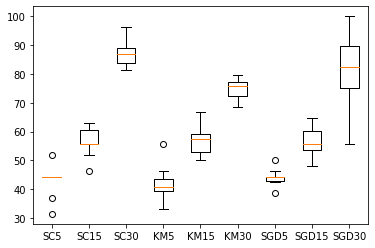

In [5]:
plt.boxplot(Racc,labels=meth2)
plt.show()

**ARI**

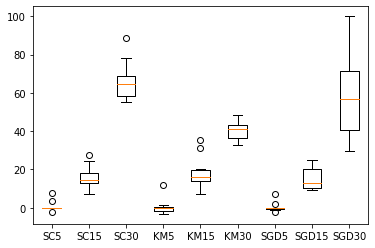

In [6]:
plt.boxplot(Rari,labels=meth2)
plt.show()

In [0]:
Racc=np.zeros((10,12))
Rari=np.zeros((10,12))
Rjacc=np.zeros((10,12))
Rpuri=np.zeros((10,12))
meth=['sc_5db','sc_15db','sc_30db','Knn5db','Knn15db','Knn30db','SGD5db','SGD15db','SGD30db','SGDKmeans5db','SGDKmeans15db','SGDKmeans30db']
meth2=['SC','Kmeans','PRI']
j=0
for i in meth:
  aux=load('/content/PRI/sintetic/happy/happy'+i+'.joblib')
  Racc[:,j]=aux['acc']
  Rari[:,j]=aux['ari']
  Rjacc[:,j]=aux['jacc']
  Rpuri[:,j]=aux['puri']
  j+=1

In [14]:
print('Accuracy: '+str(np.mean(Racc,axis=0))+' +- '+str(np.std(Racc,axis=0)))
print('Ari: '+str(np.mean(Rari,axis=0))+' +- '+str(np.std(Rari,axis=0)))
print('Jaccard: '+str(np.mean(Rjacc,axis=0))+' +- '+str(np.std(Rjacc,axis=0)))
print('Purity: '+str(np.mean(Rpuri,axis=0))+' +- '+str(np.std(Rpuri,axis=0)))

Accuracy: [43.14814815 56.66666667 87.22222222 41.85185185 57.40740741 74.44444444
 44.25925926 56.48148148 81.85185185 49.44444444 54.81481481 72.03703704] +- [ 5.10856082  4.91351821  4.49431893  5.68973759  5.23782801  3.68513866
  2.67719117  5.38312661 13.14162593  5.917239    6.42568577  6.33160037]
Ari: [ 0.86971233 15.82011279 66.182089    0.4841053  18.30071201 40.01541994
  0.5176244  15.24373692 59.74801301  5.90010607 13.88553268 36.86246082] +- [ 2.59898341  5.87698221 10.02361507  3.9415905   8.28543842  4.52315591
  2.37996045  5.71444948 24.0910493   5.86537142  7.90921799  9.38297999]
Jaccard: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.         28.78785769 36.1711746  54.33139278] +- [0.         0.         0.         0.         0.         0.
 0.         0.         0.         7.57292461 8.02240579 8.28661252]
Purity: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.         50.

2. **Moons**

In [0]:
Racc=np.zeros((10,9))
Rari=np.zeros((10,9))
meth=['sc_5db','sc_15db','sc_30db','Knn5db','Knn15db','Knn30db','SGD5db','SGD15db','SGD30db']
meth2=['SC5','SC15','SC30','KM5','KM15','KM30','SGD5','SGD15','SGD30']
j=0
for i in meth:
  aux=load('/content/PRI/sintetic/moons/moons'+i+'.joblib')
  Racc[:,j]=aux['acc']
  Rari[:,j]=aux['ari']
  j+=1

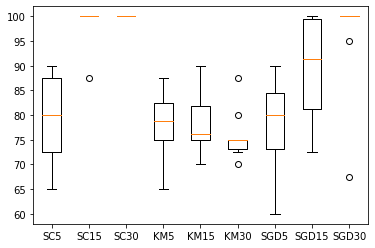

In [8]:
plt.boxplot(Racc,labels=meth2)
plt.show()

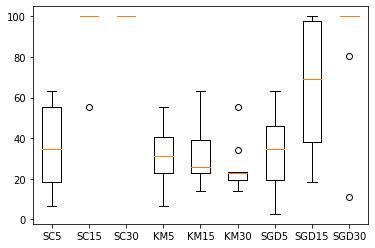

In [9]:
plt.boxplot(Rari,labels=meth2)
plt.show()

In [0]:
Racc=np.zeros((10,12))
Rari=np.zeros((10,12))
Rjacc=np.zeros((10,12))
Rpuri=np.zeros((10,12))
meth=['sc_5db','sc_15db','sc_30db','Knn5db','Knn15db','Knn30db','SGD5db','SGD15db','SGD30db','SGDKmeans5db','SGDKmeans15db','SGDKmeans30db']
meth2=['SC','Kmeans','PRI']
j=0
for i in meth:
  aux=load('/content/PRI/sintetic/moons/moons'+i+'.joblib')
  Racc[:,j]=aux['acc']
  Rari[:,j]=aux['ari']
  Rjacc[:,j]=aux['jacc']
  Rpuri[:,j]=aux['puri']
  j+=1

In [16]:
print('Accuracy: '+str(np.mean(Racc,axis=0))+' +- '+str(np.std(Racc,axis=0)))
print('Ari: '+str(np.mean(Rari,axis=0))+' +- '+str(np.std(Rari,axis=0)))
print('Jaccard: '+str(np.mean(Rjacc,axis=0))+' +- '+str(np.std(Rjacc,axis=0)))
print('Purity: '+str(np.mean(Rpuri,axis=0))+' +- '+str(np.std(Rpuri,axis=0)))

Accuracy: [ 79.5   98.75 100.    78.25  78.75  75.75  77.75  89.25  96.25  81.25
  75.25  77.25] +- [ 8.71779789  3.75        0.          6.32949445  5.94243216  4.61654633
  8.69266933 10.43132302  9.69858237  5.03115295  9.45052909 10.3350133 ]
Ari: [ 36.23593686  95.51724138 100.          31.79443373  32.75557929
  25.50816172  32.24500781  65.18889834  89.14362253  38.53768017
  27.51993018  32.61963602] +- [20.64151199 13.44827586  0.         13.93577161 14.96721885 11.07537435
 17.97641471 32.16535057 26.71087879 13.06197595 13.30743892 15.98382648]
Jaccard: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.         68.58999189 60.15417662 62.72150434] +- [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          7.23928611 13.08116902 14.35019547]
Purity: [ 0.    0.    0.    0.    0.    0.    0.    0.    0.   81.25 75.25 77.25] +- [ 0.          0.          0.          0.          0.          0

### **Parte 2. Real dataset**

In [0]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
wine= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
sonar=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data')
glass=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data')
ecoli=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data')
liver=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data')
ionosphere=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data')

**Iris**

**Pre procesamiento de la base de datos**

In [0]:
iris,labels_iris=pre_process(iris)

**Resultados**

**SGD+Kmeans**

In [0]:
n_clusters=3
steps =[[('rep', MiniBatchPRI())]] 
   
parameters =[ {'rep__lambda_':[7,35,70],'rep__sigma_initial':[20,40],'rep__learning_rate':[0.001,0.005,0.01,0.05],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['Kmeans'],'rep__optimization':['Nadam',None]}]

In [0]:
for i in range(len(steps)):
    meth_name = ['SGDkmeans']
    name='/content/PRI/iris' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    jacc=np.zeros(Niter)
    puri=np.zeros(Niter)
    Nc = len(np.unique(labels_iris))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(iris,labels_iris,test_size=0.2, stratify=labels_iris)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      jacc[j]=100*jaccard_score(y_test,y_pred,average='weighted')
      puri[j]=100*purity_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'jacc':jacc,
        'puri':puri,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   27.0s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   32.4s finished


it 1/10
{'rep__lambda_': 35, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 90.0
ari: 72.66678987248198
it 2/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   24.5s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   29.9s finished


it 2/10
{'rep__lambda_': 70, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 86.66666666666667
ari: 66.71449067431851
it 3/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   24.4s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   29.7s finished


it 3/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 90.0
ari: 73.10420076377522
it 4/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   24.4s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   29.8s finished


it 4/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 86.66666666666667
ari: 65.90742101396032
it 5/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   24.7s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   30.2s finished


it 5/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 90.0
ari: 72.66678987248198
it 6/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   24.5s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   29.9s finished


it 6/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 86.66666666666667
ari: 66.71449067431851
it 7/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   24.4s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   29.8s finished


it 7/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 90.0
ari: 72.66678987248198
it 8/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   24.3s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   29.8s finished


it 8/10
{'rep__lambda_': 70, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 96.66666666666667
ari: 89.817039364258
it 9/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   24.5s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   29.9s finished


it 9/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 83.33333333333334
ari: 61.67400881057269
it 10/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   24.5s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   29.9s finished


it 10/10
{'rep__lambda_': 70, 'rep__learning_rate': 0.005, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 93.33333333333333
ari: 80.82292432035268


**SGD+SC**

In [0]:
n_clusters=3
steps =[[('rep',SC())],
        [('rep',Kmeans())],  
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[1,50,100,500],'rep__n_neighbors_':[5],'rep__nn_':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[7,35,70],'rep__sigma_initial':[20,40],'rep__learning_rate':[0.001,0.005,0.01,0.05],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[1,50,100,500],'rep__optimization':['Nadam',None]}]

In [0]:
for i in range(len(steps)):
    #meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db', 'FP'+str(k)+'db','SGD'+str(k)+'db']
    meth_name = ['sc_'+'db', 'Knn'+'db','SGD'+'db']
    name='/content/PRI/iris' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    jacc=np.zeros(Niter)
    puri=np.zeros(Niter)
    Nc = len(np.unique(labels_iris))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(iris,labels_iris,test_size=0.2, stratify=labels_iris)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      jacc[j]=100*jaccard_score(y_test,y_pred,average='weighted')
      puri[j]=100*purity_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'jacc':jacc,
        'puri':puri,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   27.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 76.66666666666667
ari: 53.4977973568282
it 2/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   23.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 83.33333333333334
ari: 60.44735406437533
it 3/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   25.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 86.66666666666667
ari: 66.71449067431851
it 4/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   27.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 83.33333333333334
ari: 61.67400881057269
it 5/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   27.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 86.66666666666667
ari: 65.90742101396032
it 6/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   26.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 73.33333333333333
ari: 54.39056356487549
it 7/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   22.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 86.66666666666667
ari: 66.71449067431851
it 8/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   26.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 80.0
ari: 57.971014492753625
it 9/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   25.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 73.33333333333333
ari: 54.39056356487549
it 10/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   26.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 76.66666666666667
ari: 55.56490991749452
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 90.0
ari: 73.10420076377522
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 86.66666666666667
ari: 66.71449067431851
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 83.33333333333334
ari: 61.67400881057269
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 86.66666666666667
ari: 66.71449067431851
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 86.66666666666667
ari: 66.71449067431851
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 93.33333333333333
ari: 80.82292432035268
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 93.33333333333333
ari: 80.82292432035268
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 90.0
ari: 73.10420076377522
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 96.66666666666667
ari: 89.817039364258
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 93.33333333333333
ari: 80.66666666666666
it 1/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   26.9s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  6.2min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 14.8min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 17.1min finished


it 1/10
{'rep__gamma_': 1, 'rep__lambda_': 7, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 86.66666666666667
ari: 66.71449067431851
it 2/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   26.9s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  6.3min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 14.5min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 17.0min finished


it 2/10
{'rep__gamma_': 1, 'rep__lambda_': 7, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 86.66666666666667
ari: 65.90742101396032
it 3/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   26.9s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  6.4min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 15.2min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 17.5min finished


it 3/10
{'rep__gamma_': 1, 'rep__lambda_': 70, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 96.66666666666667
ari: 89.817039364258
it 4/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   27.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  6.2min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 14.5min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 16.8min finished


it 4/10
{'rep__gamma_': 1, 'rep__lambda_': 7, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 96.66666666666667
ari: 89.817039364258
it 5/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   26.9s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  6.2min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 14.7min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 16.9min finished


it 5/10
{'rep__gamma_': 1, 'rep__lambda_': 70, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 83.33333333333334
ari: 61.67400881057269
it 6/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   26.9s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  6.2min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 15.1min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 17.4min finished


it 6/10
{'rep__gamma_': 1, 'rep__lambda_': 7, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 80.0
ari: 55.25349008082292
it 7/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   27.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  6.3min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 14.5min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 16.7min finished


it 7/10
{'rep__gamma_': 1, 'rep__lambda_': 70, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 90.0
ari: 73.10420076377522
it 8/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   26.7s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  6.3min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 14.6min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 16.9min finished


it 8/10
{'rep__gamma_': 1, 'rep__lambda_': 7, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 86.66666666666667
ari: 66.71449067431851
it 9/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   26.9s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  6.1min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 14.7min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 17.0min finished


it 9/10
{'rep__gamma_': 1, 'rep__lambda_': 35, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 83.33333333333334
ari: 60.44735406437533
it 10/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   26.8s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  6.4min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 14.6min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 16.8min finished


it 10/10
{'rep__gamma_': 1, 'rep__lambda_': 70, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 93.33333333333333
ari: 80.82292432035268


**Sonar**

**Pre procesamiento de la base de datos**

In [0]:
sonar,labels_sonar=pre_process(sonar)

**Resultados**

**SGD+Kmeans**

In [0]:
n_clusters=2
steps =[[('rep', MiniBatchPRI())]] 
   
parameters =[ {'rep__lambda_':[7,35,70],'rep__sigma_initial':[20,40],'rep__learning_rate':[0.001,0.005,0.01,0.05],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['Kmeans'],'rep__optimization':['Nadam',None]}]

In [0]:
for i in range(len(steps)):
    meth_name = ['SGDkmeans']
    name='/content/PRI/sonar' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    jacc=np.zeros(Niter)
    puri=np.zeros(Niter)
    Nc = len(np.unique(labels_sonar))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(sonar,labels_sonar,test_size=0.2, stratify=labels_sonar)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      jacc[j]=100*jaccard_score(y_test,y_pred,average='weighted')
      puri[j]=100*purity_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'jacc':jacc,
        'puri':puri,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   41.0s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   50.4s finished


it 1/10
{'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 52.38095238095239
ari: 0.0
it 2/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   42.0s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   51.1s finished


it 2/10
{'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 54.761904761904766
ari: -1.481261715641979
it 3/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   42.1s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   51.7s finished


it 3/10
{'rep__lambda_': 35, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 47.61904761904761
ari: -0.7681831723198712
it 4/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   42.7s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   52.4s finished


it 4/10
{'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 52.38095238095239
ari: 0.0
it 5/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   43.7s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   53.7s finished


it 5/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 57.14285714285714
ari: 0.4602967308227429
it 6/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   11.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   47.4s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   56.8s finished


it 6/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 52.38095238095239
ari: 0.0
it 7/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   42.5s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   52.2s finished


it 7/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 52.38095238095239
ari: 0.0
it 8/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   41.6s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   50.6s finished


it 8/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 64.28571428571429
ari: 6.046154467930325
it 9/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   41.8s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   51.0s finished


it 9/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 52.38095238095239
ari: 0.0
it 10/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   42.7s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   52.2s finished


it 10/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 57.14285714285714
ari: 1.4226651118414182


**SGD+SC**

In [0]:
n_clusters=2
steps =[[('rep',SC())],
        [('rep',Kmeans())],  
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[1,50,100,500],'rep__n_neighbors_':[5],'rep__nn_':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[7,35,70],'rep__sigma_initial':[20,40],'rep__learning_rate':[0.001,0.005,0.01,0.05],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[1,50,100,500],'rep__optimization':['Nadam',None]}]

In [0]:
for i in range(len(steps)):
    #meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db', 'FP'+str(k)+'db','SGD'+str(k)+'db']
    meth_name = ['sc_'+'db', 'Knn'+'db','SGD'+'db']
    name='/content/PRI/sonar' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    jacc=np.zeros(Niter)
    puri=np.zeros(Niter)
    Nc = len(np.unique(labels_sonar))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(sonar,labels_sonar,test_size=0.2, stratify=labels_sonar)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      jacc[j]=100*jaccard_score(y_test,y_pred,average='weighted')
      puri[j]=100*purity_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'jacc':jacc,
        'puri':puri,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          }
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   23.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 50.0
ari: -1.1659228668487325
it 2/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   26.5s finished


it 2/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 52.38095238095239
ari: 0.0
it 3/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   24.4s finished


it 3/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 52.38095238095239
ari: 0.0
it 4/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   23.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


it 4/10
{'rep__gamma_': 500, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 52.38095238095239
ari: 0.0
it 5/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   23.6s finished


it 5/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 52.38095238095239
ari: 0.0
it 6/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   26.3s finished


it 6/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 52.38095238095239
ari: 0.0
it 7/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   23.6s finished


it 7/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 52.38095238095239
ari: 0.0
it 8/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   25.6s finished


it 8/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 52.38095238095239
ari: 0.0
it 9/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   27.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 54.761904761904766
ari: -1.481261715641979
it 10/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   23.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 500, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 52.38095238095239
ari: 0.0
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 50.0
ari: -2.3052984682536457
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 52.38095238095239
ari: 0.0
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 59.523809523809526
ari: 1.2446800184596933
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 52.38095238095239
ari: -2.0054282267792467
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 52.38095238095239
ari: 0.0
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 45.23809523809524
ari: -1.5645371577575007
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 57.14285714285714
ari: -0.39732239257179214
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 52.38095238095239
ari: 0.0
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 52.38095238095239
ari: 0.0
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 52.38095238095239
ari: 0.0
it 1/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   45.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  8.1min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 19.7min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 22.7min finished


it 1/10
{'rep__gamma_': 500, 'rep__lambda_': 35, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 52.38095238095239
ari: 0.0
it 2/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   45.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  7.9min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 19.4min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 22.8min finished


it 2/10
{'rep__gamma_': 1, 'rep__lambda_': 70, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 47.61904761904761
ari: -2.0054282267792467
it 3/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   11.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   45.7s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  8.1min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 19.4min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 22.4min finished


it 3/10
{'rep__gamma_': 1, 'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 47.61904761904761
ari: -2.214595609661338
it 4/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   45.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  8.0min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 19.5min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 22.6min finished


it 4/10
{'rep__gamma_': 1, 'rep__lambda_': 35, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 52.38095238095239
ari: 0.0
it 5/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   45.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  7.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 19.1min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 22.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 500, 'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 52.38095238095239
ari: 0.0
it 6/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   45.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  8.0min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 19.9min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 23.1min finished


it 6/10
{'rep__gamma_': 1, 'rep__lambda_': 35, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 52.38095238095239
ari: 0.0
it 7/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   45.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  8.0min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 19.5min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 22.7min finished


it 7/10
{'rep__gamma_': 1, 'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 47.61904761904761
ari: -1.0951710003842783
it 8/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   46.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  7.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 19.5min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 23.0min finished


it 8/10
{'rep__gamma_': 1, 'rep__lambda_': 35, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 52.38095238095239
ari: -2.256532066508307
it 9/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   46.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  7.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 19.6min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 22.8min finished


it 9/10
{'rep__gamma_': 1, 'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 69.04761904761905
ari: 12.45209229565898
it 10/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   44.8s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  8.1min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 19.8min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 23.1min finished


it 10/10
{'rep__gamma_': 1, 'rep__lambda_': 35, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 52.38095238095239
ari: 0.0


**Wine**

**Pre procesamiento**

In [0]:
aux=wine['1']
wine=wine.drop(['1'],axis=1)
wine.insert(wine.shape[1],'1',aux)
wine,labels_wine=pre_process(wine)

**SGD+Kmeans**

In [0]:
n_clusters=3
steps =[[('rep', MiniBatchPRI())]] 
   
parameters =[ {'rep__lambda_':[7,35,70],'rep__sigma_initial':[20,40],'rep__learning_rate':[0.001,0.005,0.01,0.05],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['Kmeans'],'rep__optimization':['Nadam',None]}]

In [0]:
for i in range(len(steps)):
    meth_name = ['SGDkmeans']
    name='/content/PRI/wine' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    jacc=np.zeros(Niter)
    puri=np.zeros(Niter)
    Nc = len(np.unique(labels_wine))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(wine,labels_wine,test_size=0.2, stratify=labels_wine)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      jacc[j]=100*jaccard_score(y_test,y_pred,average='weighted')
      puri[j]=100*purity_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'jacc':jacc,
        'puri':puri,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   28.3s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   34.6s finished


it 1/10
{'rep__lambda_': 35, 'rep__learning_rate': 0.005, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 55.55555555555556
ari: 28.68959512407488
it 2/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   28.4s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   34.7s finished


it 2/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 63.888888888888886
ari: 28.481654165822018
it 3/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   28.9s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   35.2s finished


it 3/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 63.888888888888886
ari: 31.746031746031743
it 4/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   28.5s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   34.9s finished


it 4/10
{'rep__lambda_': 35, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 69.44444444444444
ari: 43.80701398743159
it 5/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   28.7s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   35.0s finished


it 5/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.005, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 61.111111111111114
ari: 21.89249720044793
it 6/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   28.5s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   34.8s finished


it 6/10
{'rep__lambda_': 70, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 61.111111111111114
ari: 24.650314210419623
it 7/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   28.8s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   35.1s finished


it 7/10
{'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 66.66666666666666
ari: 43.17460317460318
it 8/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   28.5s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   34.8s finished


it 8/10
{'rep__lambda_': 70, 'rep__learning_rate': 0.005, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 66.66666666666666
ari: 43.17460317460318
it 9/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   28.4s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   34.7s finished


it 9/10
{'rep__lambda_': 35, 'rep__learning_rate': 0.005, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 61.111111111111114
ari: 30.718475073313776
it 10/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   28.3s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   34.6s finished


it 10/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 66.66666666666666
ari: 39.203032672493144


**SGD+SC**

**Pruebas**

In [0]:
n_clusters=3
steps =[[('rep',SC())],
        [('rep',Kmeans())],  
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[1,50,100,500],'rep__n_neighbors_':[5],'rep__nn_':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[7,35,70],'rep__sigma_initial':[20,40],'rep__learning_rate':[0.001,0.005,0.01,0.05],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[1,50,100,500],'rep__optimization':['Nadam',None]}]

In [0]:
for i in range(len(steps)):
    #meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db', 'FP'+str(k)+'db','SGD'+str(k)+'db']
    meth_name = ['sc_'+'db', 'Knn'+'db','SGD'+'db']
    name='/content/PRI/wine' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    jacc=np.zeros(Niter)
    puri=np.zeros(Niter)
    Nc = len(np.unique(labels_wine))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(wine,labels_wine,test_size=0.2, stratify=labels_wine)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      jacc[j]=100*jaccard_score(y_test,y_pred,average='weighted')
      puri[j]=100*purity_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'jacc':jacc,
        'puri':puri,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          }
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 50, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 38.88888888888889
ari: 0.0
it 2/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 50, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 38.88888888888889
ari: 0.0
it 3/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 50, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 38.88888888888889
ari: 0.0
it 4/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 50, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 38.88888888888889
ari: 0.0
it 5/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 33.33333333333333
ari: -1.0885980367480526
it 6/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 50, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 38.88888888888889
ari: 0.0
it 7/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 38.88888888888889
ari: 0.0
it 8/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 50, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 38.88888888888889
ari: 0.0
it 9/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 38.88888888888889
ari: 0.0
it 10/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 50, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 38.88888888888889
ari: 0.0
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 66.66666666666666
ari: 39.07438935408777
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 61.111111111111114
ari: 23.557692307692307
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 63.888888888888886
ari: 26.897442639443025
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 72.22222222222221
ari: 36.885445259025055
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc:

[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


 72.22222222222221
ari: 37.37718481745786
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 72.22222222222221
ari: 36.488276974480094
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 61.111111111111114
ari: 27.304146168481015


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 66.66666666666666
ari: 24.345847554038684
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished


it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 66.66666666666666
ari: 34.417507171277876
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 66.66666666666666
ari: 36.53846153846153
it 1/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   33.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  2.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 100, 'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 38.88888888888889
ari: 0.0
it 2/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   33.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  2.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 100, 'rep__lambda_': 35, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 38.88888888888889
ari: 0.0
it 3/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   32.8s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  2.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 500, 'rep__lambda_': 70, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 55.55555555555556
ari: 6.359053896859248
it 4/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   32.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  2.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 100, 'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 55.55555555555556
ari: 13.704934799284072
it 5/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   33.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  2.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 500, 'rep__lambda_': 7, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 38.88888888888889
ari: 0.0
it 6/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   32.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  2.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 100, 'rep__lambda_': 70, 'rep__learning_rate': 0.05, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 38.88888888888889
ari: 0.0
it 7/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   33.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  2.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 50, 'rep__lambda_': 35, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 41.66666666666667
ari: 0.10698047606312153
it 8/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   32.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  2.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 50, 'rep__lambda_': 70, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 38.88888888888889
ari: 0.0
it 9/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   33.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  2.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 100, 'rep__lambda_': 35, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 44.44444444444444
ari: 2.638838113596329
it 10/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   34.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  2.7min finished


it 10/10
{'rep__gamma_': 100, 'rep__lambda_': 7, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 33.33333333333333
ari: -3.104889414897551


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


**Liver**

In [0]:
liver,labels_liver=pre_process(liver)

**SGD+Kmeans**

In [0]:
n_clusters=2
steps =[[('rep', MiniBatchPRI())]] 
   
parameters =[ {'rep__lambda_':[7,35,70],'rep__sigma_initial':[20,40],'rep__learning_rate':[0.001,0.005,0.01,0.05],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['Kmeans'],'rep__optimization':['Nadam',None]}]

In [0]:
for i in range(len(steps)):
    meth_name = ['SGDkmeans']
    name='/content/PRI/liver' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    jacc=np.zeros(Niter)
    puri=np.zeros(Niter)
    Nc = len(np.unique(labels_liver))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(liver,labels_liver,test_size=0.2, stratify=labels_liver)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      jacc[j]=100*jaccard_score(y_test,y_pred,average='weighted')
      puri[j]=100*purity_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'jacc':jacc,
        'puri':puri,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   18.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  1.6min finished


it 1/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 57.971014492753625
ari: 0.0
it 2/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   18.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  1.7min finished


it 2/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 57.971014492753625
ari: 0.0
it 3/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   18.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  1.7min finished


it 3/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 57.971014492753625
ari: 0.0
it 4/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   18.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  1.7min finished


it 4/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 57.971014492753625
ari: 0.0
it 5/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   18.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  1.7min finished


it 5/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 57.971014492753625
ari: 0.0
it 6/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   18.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  1.7min finished


it 6/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 57.971014492753625
ari: 0.0
it 7/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   18.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  1.7min finished


it 7/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 57.971014492753625
ari: 0.0
it 8/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   17.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  1.8min finished


it 8/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 57.971014492753625
ari: 0.0
it 9/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   18.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  1.7min finished


it 9/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 57.971014492753625
ari: 0.0
it 10/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   18.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  1.7min finished


it 10/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 57.971014492753625
ari: 0.0


**SGD+SC**

In [0]:
n_clusters=2
steps =[[('rep',SC())],
        [('rep',Kmeans())],  
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[1,50,100,500],'rep__n_neighbors_':[5],'rep__nn_':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[7,35,70],'rep__sigma_initial':[20,40],'rep__learning_rate':[0.001,0.005,0.01,0.05],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[1,50,100,500],'rep__optimization':['Nadam',None]}]

In [0]:
for i in range(len(steps)):
    #meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db', 'FP'+str(k)+'db','SGD'+str(k)+'db']
    meth_name = ['sc_'+'db', 'Knn'+'db','SGD'+'db']
    name='/content/PRI/liver' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    jacc=np.zeros(Niter)
    puri=np.zeros(Niter)
    Nc = len(np.unique(labels_liver))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(liver,labels_liver,test_size=0.2,stratify=labels_liver)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      jacc[j]=100*jaccard_score(y_test,y_pred,average='weighted')
      puri[j]=100*purity_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'jacc':jacc,
        'puri':puri,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          }
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   27.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 57.971014492753625
ari: 0.0
it 2/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   27.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 56.52173913043478
ari: -0.7965839284822294
it 3/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   28.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 500, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 57.971014492753625
ari: 0.0
it 4/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   25.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


it 4/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 57.971014492753625
ari: 0.0
it 5/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   28.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


it 5/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 57.971014492753625
ari: 0.0
it 6/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   28.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 57.971014492753625
ari: 0.0
it 7/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   28.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


it 7/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 57.971014492753625
ari: 0.0
it 8/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   26.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 57.971014492753625
ari: 0.12786053073128814
it 9/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   26.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 57.971014492753625
ari: 0.12786053073128814
it 10/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   25.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 50, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 57.971014492753625
ari: 0.0
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 57.971014492753625
ari: 0.0
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 57.971014492753625
ari: 0.0
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 57.971014492753625
ari: 0.0
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 57.971014492753625
ari: 0.0
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 57.971014492753625
ari: 0.0
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 57.971014492753625
ari: 0.0
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 57.971014492753625
ari: 0.0
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 57.971014492753625
ari: 0.0
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 57.971014492753625
ari: 0.0
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 57.971014492753625
ari: 0.0
it 1/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   20.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.6min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  6.4min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  7.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 500, 'rep__lambda_': 35, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 57.971014492753625
ari: 0.0
it 2/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   22.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  6.7min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  8.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 100, 'rep__lambda_': 35, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 57.971014492753625
ari: 0.0
it 3/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   21.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  6.6min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  7.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 50, 'rep__lambda_': 35, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 57.971014492753625
ari: 0.0
it 4/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   19.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.6min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  6.5min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  7.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 500, 'rep__lambda_': 70, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 57.971014492753625
ari: 0.0
it 5/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  6.7min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  8.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 50, 'rep__lambda_': 35, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 57.971014492753625
ari: 0.0
it 6/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   21.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  6.6min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  8.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 50, 'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 57.971014492753625
ari: 0.0
it 7/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  6.5min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  7.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 100, 'rep__lambda_': 35, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 57.971014492753625
ari: 0.0
it 8/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   22.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  6.6min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  8.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 100, 'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 57.971014492753625
ari: 0.0
it 9/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   21.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  6.4min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  7.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


it 9/10
{'rep__gamma_': 500, 'rep__lambda_': 70, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 57.971014492753625
ari: 0.0
it 10/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   21.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.5min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  6.2min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  7.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


it 10/10
{'rep__gamma_': 500, 'rep__lambda_': 35, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 57.971014492753625
ari: 0.0


**Ionosphere**

In [0]:
ionosphere,labels_ionosphere=pre_process(ionosphere)

In [0]:
ionosphere[10][1]='0.852431'

**SGD+Kmeans**

In [0]:
n_clusters=2
steps =[[('rep', MiniBatchPRI())]] 
parameters =[ {'rep__lambda_':[7,35,70],'rep__sigma_initial':[20,40],'rep__learning_rate':[0.001,0.005,0.01,0.05],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['Kmeans'],'rep__optimization':['Nadam',None]}]

In [0]:
for i in range(len(steps)):
    meth_name = ['SGDkmeans']
    name='/content/PRI/ionosphere' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    jacc=np.zeros(Niter)
    puri=np.zeros(Niter)
    Nc = len(np.unique(labels_ionosphere))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(ionosphere,labels_ionosphere,test_size=0.2, stratify=labels_ionosphere)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      jacc[j]=100*jaccard_score(y_test,y_pred,average='weighted')
      puri[j]=100*purity_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'jacc':jacc,
        'puri':puri,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  2.2min finished


it 1/10
{'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 67.6056338028169
ari: 5.63713097584383
it 2/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  2.2min finished


it 2/10
{'rep__lambda_': 70, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 71.83098591549296
ari: 17.220500393534927
it 3/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   24.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  2.3min finished


it 3/10
{'rep__lambda_': 35, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 60.56338028169014
ari: 2.9561347743166007
it 4/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   22.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  2.2min finished


it 4/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 73.23943661971832
ari: 20.423297572359246
it 5/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   24.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  2.2min finished


it 5/10
{'rep__lambda_': 70, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 74.64788732394366
ari: 23.10643901552993
it 6/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  2.2min finished


it 6/10
{'rep__lambda_': 35, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 57.74647887323944
ari: -4.7194052350281
it 7/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  2.2min finished


it 7/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 67.6056338028169
ari: 10.941441134364984
it 8/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  2.2min finished


it 8/10
{'rep__lambda_': 35, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 67.6056338028169
ari: 11.208062814346833
it 9/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   22.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  2.1min finished


it 9/10
{'rep__lambda_': 35, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 64.7887323943662
ari: 7.040856157699567
it 10/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   22.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  2.2min finished


it 10/10
{'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 69.01408450704226
ari: 13.11188811188812


**SGD+SC**

In [0]:
n_clusters=2
steps =[[('rep',SC())],
        [('rep',Kmeans())],  
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[1,50,100,500],'rep__n_neighbors_':[5],'rep__nn_':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[7,35,70],'rep__sigma_initial':[20,40],'rep__learning_rate':[0.001,0.005,0.01,0.05],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[1,50,100,500],'rep__optimization':['Nadam',None]}]

In [0]:
for i in range(len(steps)):
    #meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db', 'FP'+str(k)+'db','SGD'+str(k)+'db']
    meth_name = ['sc_'+'db', 'Knn'+'db','SGD'+'db']
    name='/content/PRI/ionosphere' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    jacc=np.zeros(Niter)
    puri=np.zeros(Niter)
    Nc = len(np.unique(labels_ionosphere))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(ionosphere,labels_ionosphere,test_size=0.2,stratify=labels_ionosphere)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      jacc[j]=100*jaccard_score(y_test,y_pred,average='weighted')
      puri[j]=100*purity_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'jacc':jacc,
        'puri':puri,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          }
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  1.2min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 64.7887323943662
ari: 0.0
it 2/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  1.3min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 64.7887323943662
ari: 0.0
it 3/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  1.3min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 64.7887323943662
ari: 0.0
it 4/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  1.2min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 64.7887323943662
ari: 0.0
it 5/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  1.2min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 64.7887323943662
ari: 0.0
it 6/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  1.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


it 6/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 64.7887323943662
ari: 0.0
it 7/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  1.2min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 64.7887323943662
ari: 0.0
it 8/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  1.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


it 8/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 64.7887323943662
ari: 0.0
it 9/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  1.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


it 9/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 64.7887323943662
ari: 0.0
it 10/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  1.3min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 64.7887323943662
ari: 0.0
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 76.05633802816901
ari: 26.141039878522193
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 78.87323943661971
ari: 32.23805303701683
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 71.83098591549296
ari: 17.963971078472618
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 74.64788732394366
ari: 23.10643901552993
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 69.01408450704226
ari: 13.226438624621418
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 81.69014084507043
ari: 39.27041130522153
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 69.01408450704226
ari: 12.755902947402703
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 66.19718309859155
ari: 9.310383874985849
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 77.46478873239437
ari: 28.94301599009595
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 66.19718309859155
ari: 9.277803310310894
it 1/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   27.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 14.3min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 34.7min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 42.9min finished


it 1/10
{'rep__gamma_': 1, 'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 64.7887323943662
ari: 0.0
it 2/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   30.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 15.2min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 35.7min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 44.0min finished


it 2/10
{'rep__gamma_': 1, 'rep__lambda_': 7, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 64.7887323943662
ari: 0.0
it 3/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   29.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.4min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 16.0min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 37.6min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 45.8min finished


it 3/10
{'rep__gamma_': 1, 'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 64.7887323943662
ari: 0.0
it 4/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   28.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.1min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 14.9min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 36.0min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 44.1min finished


it 4/10
{'rep__gamma_': 1, 'rep__lambda_': 70, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 64.7887323943662
ari: 0.0
it 5/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   28.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.4min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 15.4min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 36.9min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 44.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


it 5/10
{'rep__gamma_': 500, 'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 64.7887323943662
ari: 0.0
it 6/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   30.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 14.0min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 34.7min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 42.9min finished


it 6/10
{'rep__gamma_': 50, 'rep__lambda_': 7, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 64.7887323943662
ari: 0.0
it 7/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   28.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 14.4min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 35.4min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 43.9min finished


it 7/10
{'rep__gamma_': 1, 'rep__lambda_': 70, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 64.7887323943662
ari: 0.0
it 8/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   26.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.1min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 14.5min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 34.8min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 43.1min finished


it 8/10
{'rep__gamma_': 1, 'rep__lambda_': 7, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 64.7887323943662
ari: 0.0
it 9/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   28.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.1min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 15.6min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 36.6min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 44.5min finished


it 9/10
{'rep__gamma_': 1, 'rep__lambda_': 7, 'rep__learning_rate': 0.05, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 64.7887323943662
ari: 0.0
it 10/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   28.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 15.0min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 35.5min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 43.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


it 10/10
{'rep__gamma_': 500, 'rep__lambda_': 35, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 64.7887323943662
ari: 0.0


**Glass**

In [0]:
glass=glass.drop(columns='1')
glass,labels_glass=pre_process(glass)
glass=glass.drop([1])
labels_glass = [x for i,x in enumerate(labels_glass) if i!=1] 
labels_glass=np.array(labels_glass)


**SGD+Kmeans**

In [0]:
n_clusters=2
steps =[[('rep', MiniBatchPRI())]] 
parameters =[ {'rep__lambda_':[7,35,70],'rep__sigma_initial':[20,40],'rep__learning_rate':[0.001,0.005,0.01,0.05],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['Kmeans'],'rep__optimization':['Nadam',None]}]

In [0]:
for i in range(len(steps)):
    meth_name = ['SGDkmeans']
    name='/content/PRI/glass' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    jacc=np.zeros(Niter)
    puri=np.zeros(Niter)
    Nc = len(np.unique(labels_glass))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(glass,labels_glass,test_size=0.2, stratify=labels_glass)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      jacc[j]=100*jaccard_score(y_test,y_pred,average='weighted')
      puri[j]=100*purity_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'jacc':jacc,
        'puri':puri,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   34.6s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   42.9s finished


it 1/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 37.2093023255814
ari: 0.8806988416776133
it 2/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   34.8s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   43.3s finished


it 2/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 46.51162790697674
ari: 6.472986373820104
it 3/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   34.6s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   43.0s finished


it 3/10
{'rep__lambda_': 35, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 34.883720930232556
ari: 0.0
it 4/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   34.8s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   43.0s finished


it 4/10
{'rep__lambda_': 70, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 34.883720930232556
ari: 0.0
it 5/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   34.8s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   43.2s finished


it 5/10
{'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 20}
acc: 34.883720930232556
ari: 0.0
it 6/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   34.8s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   43.1s finished


it 6/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.01, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 34.883720930232556
ari: 0.0
it 7/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   34.6s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   43.0s finished


it 7/10
{'rep__lambda_': 70, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 34.883720930232556
ari: 0.0
it 8/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   35.5s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   44.1s finished


it 8/10
{'rep__lambda_': 35, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 39.53488372093023
ari: -1.5536207705541916
it 9/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   34.6s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   43.0s finished


it 9/10
{'rep__lambda_': 7, 'rep__learning_rate': 0.005, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 41.86046511627907
ari: -2.0004305087177996
it 10/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   34.2s
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:   42.6s finished


it 10/10
{'rep__lambda_': 35, 'rep__learning_rate': 0.001, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'Kmeans', 'rep__sigma_initial': 40}
acc: 25.581395348837212
ari: 7.152739927047086


**SGD+SC**

In [0]:
n_clusters=6
steps =[[('rep',SC())],
        [('rep',Kmeans())],  
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[1,50,100,500],'rep__n_neighbors_':[5],'rep__nn_':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[7,35,70],'rep__sigma_initial':[20,40],'rep__learning_rate':[0.001,0.005,0.01,0.05],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[1,50,100,500],'rep__optimization':['Nadam',None]}]

In [0]:
for i in range(len(steps)):
    #meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db', 'FP'+str(k)+'db','SGD'+str(k)+'db']
    meth_name = ['sc_'+'db', 'Knn'+'db','SGD'+'db']
    name='/content/PRI/glass' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    jacc=np.zeros(Niter)
    puri=np.zeros(Niter)
    Nc = len(np.unique(labels_glass))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(glass,labels_glass,test_size=0.2,stratify=labels_glass)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      jacc[j]=100*jaccard_score(y_test,y_pred,average='weighted')
      puri[j]=100*purity_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'jacc':jacc,
        'puri':puri,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          }
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   27.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 1, 'rep__n_clusters_': 6, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 48.837209302325576
ari: 15.83673829979902
it 2/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   23.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 1, 'rep__n_clusters_': 6, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 39.53488372093023
ari: 13.590147690275089
it 3/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   35.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 1, 'rep__n_clusters_': 6, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 39.53488372093023
ari: 9.328369079457199
it 4/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   26.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 1, 'rep__n_clusters_': 6, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 39.53488372093023
ari: 2.3380691988173306
it 5/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   31.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 50, 'rep__n_clusters_': 6, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 34.883720930232556
ari: 0.0
it 6/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   29.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 1, 'rep__n_clusters_': 6, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 51.162790697674424
ari: 22.141132065511464
it 7/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   32.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 1, 'rep__n_clusters_': 6, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 34.883720930232556
ari: 4.164155622516735
it 8/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   30.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 1, 'rep__n_clusters_': 6, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 37.2093023255814
ari: -0.740590616281247
it 9/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   23.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 1, 'rep__n_clusters_': 6, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 48.837209302325576
ari: 32.610547634738715
it 10/10
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   20.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 1, 'rep__n_clusters_': 6, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 34.883720930232556
ari: 2.8663943573702158
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 6, 'rep__nn': 5}
acc: 53.48837209302325
ari: 32.725852776307754
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 6, 'rep__nn': 5}
acc: 51.162790697674424
ari: 27.589802408633545
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 6, 'rep__nn': 5}
acc: 53.48837209302325
ari: 26.874056132312923
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 6, 'rep__nn': 5}
acc: 60.46511627906976
ari: 21.89640675432543
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__n_clusters_': 6, 'rep__nn': 5}
acc: 55.81395348837209
ari: 28.3428117973813
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 6, 'rep__nn': 5}
acc: 53.48837209302325
ari: 26.838584226486724
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__n_clusters_': 6, 'rep__nn': 5}
acc: 60.46511627906976
ari: 29.180288105216345
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 6, 'rep__nn': 5}
acc: 48.837209302325576
ari: 11.503432244007785
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__n_clusters_': 6, 'rep__nn': 5}
acc: 60.46511627906976
ari: 28.6076036391136
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 6, 'rep__nn': 5}
acc: 58.139534883720934
ari: 27.255232138561457
it 1/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  8.7min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 11.1min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 12.7min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 13.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 500, 'rep__lambda_': 7, 'rep__learning_rate': 0.005, 'rep__n_clusters': 6, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 37.2093023255814
ari: -1.7488793469541823
it 2/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  8.5min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 11.1min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 12.8min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 13.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 500, 'rep__lambda_': 7, 'rep__learning_rate': 0.005, 'rep__n_clusters': 6, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 34.883720930232556
ari: 0.0
it 3/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  8.8min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 11.4min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 13.0min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 13.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 500, 'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 6, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 37.2093023255814
ari: -0.8625223519511949
it 4/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  7.8min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 10.0min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 11.6min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 12.3min finished


it 4/10
{'rep__gamma_': 1, 'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 6, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 34.883720930232556
ari: 0.0
it 5/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  7.6min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  9.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 11.4min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 12.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 500, 'rep__lambda_': 70, 'rep__learning_rate': 0.005, 'rep__n_clusters': 6, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 34.883720930232556
ari: 0.0
it 6/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  7.6min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  9.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 11.3min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 12.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 500, 'rep__lambda_': 70, 'rep__learning_rate': 0.001, 'rep__n_clusters': 6, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 34.883720930232556
ari: 0.0
it 7/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  7.5min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  9.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 11.3min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 11.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 500, 'rep__lambda_': 7, 'rep__learning_rate': 0.005, 'rep__n_clusters': 6, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 20}
acc: 37.2093023255814
ari: 1.211648094293047
it 8/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  7.7min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  9.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 11.2min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 11.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


it 8/10
{'rep__gamma_': 500, 'rep__lambda_': 7, 'rep__learning_rate': 0.001, 'rep__n_clusters': 6, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 34.883720930232556
ari: 0.0
it 9/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  7.8min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  9.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 11.4min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 12.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 500, 'rep__lambda_': 7, 'rep__learning_rate': 0.005, 'rep__n_clusters': 6, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 41.86046511627907
ari: 6.411562358337113
it 10/10
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  7.2min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  9.4min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 10.9min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 11.5min finished


it 10/10
{'rep__gamma_': 500, 'rep__lambda_': 35, 'rep__learning_rate': 0.005, 'rep__n_clusters': 6, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 40}
acc: 34.883720930232556
ari: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:304: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:304: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: Runtime

**Resultados**

**Iris**

In [0]:
Racc=np.zeros((10,4))
Rari=np.zeros((10,4))
Rjacc=np.zeros((10,4))
Rpuri=np.zeros((10,4))
meth=['sc_db','Knndb','SGDdb','SGDkmeans']
meth2=['SC','Kmeans','PRI']
j=0
for i in meth:
  aux=load('/content/PRI/reals/iris/iris'+i+'.joblib')
  Racc[:,j]=aux['acc']
  Rari[:,j]=aux['ari']
  Rjacc[:,j]=aux['jacc']
  Rpuri[:,j]=aux['puri']
  j+=1

In [0]:
print('Accuracy: '+str(np.mean(Racc,axis=0))+' +- '+str(np.std(Racc,axis=0)))
print('Ari: '+str(np.mean(Rari,axis=0))+' +- '+str(np.std(Rari,axis=0)))
print('Jaccard: '+str(np.mean(Rjacc,axis=0))+' +- '+str(np.std(Rjacc,axis=0)))
print('Purity: '+str(np.mean(Rpuri,axis=0))+' +- '+str(np.std(Rpuri,axis=0)))

Accuracy: [80.66666667 90.         88.33333333 89.33333333] +- [5.12076383 3.94405319 5.42627353 3.59010987]
Ari: [59.72726141 74.0155437  71.02724591 72.27549452] +- [ 5.06282491  8.36956549 11.48051647  7.7246607 ]
Jaccard: [68.8756796  82.53368853 80.34798535 81.55794206] +- [7.17228964 6.32812848 8.2989656  5.74347349]
Purity: [80.66666667 90.         88.33333333 89.33333333] +- [5.12076383 3.94405319 5.42627353 3.59010987]


**Liver**

In [0]:
Racc=np.zeros((10,4))
Rari=np.zeros((10,4))
Rjacc=np.zeros((10,4))
Rpuri=np.zeros((10,4))
meth=['sc_db','Knndb','SGDdb','SGDkmeans']
meth2=['SC','Kmeans','PRI']
j=0
for i in meth:
  aux=load('/content/PRI/reals/liver/liver'+i+'.joblib')
  Racc[:,j]=aux['acc']
  Rari[:,j]=aux['ari']
  Rjacc[:,j]=aux['jacc']
  Rpuri[:,j]=aux['puri']
  j+=1

In [0]:
print('Accuracy: '+str(np.mean(Racc,axis=0))+' +- '+str(np.std(Racc,axis=0)))
print('Ari: '+str(np.mean(Rari,axis=0))+' +- '+str(np.std(Rari,axis=0)))
print('Jaccard: '+str(np.mean(Rjacc,axis=0))+' +- '+str(np.std(Rjacc,axis=0)))
print('Purity: '+str(np.mean(Rpuri,axis=0))+' +- '+str(np.std(Rpuri,axis=0)))

Accuracy: [57.82608696 57.97101449 57.97101449 57.97101449] +- [0.43478261 0.         0.         0.        ]
Ari: [-0.05408629  0.          0.          0.        ] +- [0.25258451 0.         0.         0.        ]
Jaccard: [33.73090181 33.60638521 33.60638521 33.60638521] +- [5.22026422e-01 7.10542736e-15 7.10542736e-15 7.10542736e-15]
Purity: [57.97101449 57.97101449 57.97101449 57.97101449] +- [0. 0. 0. 0.]


**sonar**

In [0]:
Racc=np.zeros((10,4))
Rari=np.zeros((10,4))
Rjacc=np.zeros((10,4))
Rpuri=np.zeros((10,4))
meth=['sc_db','Knndb','SGDdb','SGDkmeans']
meth2=['SC','Kmeans','PRI']
j=0
for i in meth:
  aux=load('/content/PRI/reals/sonar/sonar'+i+'.joblib')
  Racc[:,j]=aux['acc']
  Rari[:,j]=aux['ari']
  Rjacc[:,j]=aux['jacc']
  Rpuri[:,j]=aux['puri']
  j+=1

In [0]:
print('Accuracy: '+str(np.mean(Racc,axis=0))+' +- '+str(np.std(Racc,axis=0)))
print('Ari: '+str(np.mean(Rari,axis=0))+' +- '+str(np.std(Rari,axis=0)))
print('Jaccard: '+str(np.mean(Rjacc,axis=0))+' +- '+str(np.std(Rjacc,axis=0)))
print('Purity: '+str(np.mean(Rpuri,axis=0))+' +- '+str(np.std(Rpuri,axis=0)))

Accuracy: [52.38095238 52.61904762 52.61904762 54.28571429] +- [1.06479427 3.60303475 5.87569651 4.23247353]
Ari: [-0.26471846 -0.50279062  0.48803654  0.56796714] +- [0.53411177 1.04704485 4.09744211 1.95832091]
Jaccard: [28.59305084 31.60235127 31.41945888 31.86370597] +- [2.97591058 5.36448204 7.47309647 6.45304331]
Purity: [52.61904762 53.80952381 54.04761905 54.76190476] +- [0.71428571 2.42810453 5.         3.68855557]


**Wine**

In [0]:
Racc=np.zeros((10,4))
Rari=np.zeros((10,4))
Rjacc=np.zeros((10,4))
Rpuri=np.zeros((10,4))
meth=['sc_db','Knndb','SGDdb','SGDkmeans']
meth2=['SC','Kmeans','PRI']
j=0
for i in meth:
  aux=load('/content/PRI/reals/wine/wine'+i+'.joblib')
  Racc[:,j]=aux['acc']
  Rari[:,j]=aux['ari']
  Rjacc[:,j]=aux['jacc']
  Rpuri[:,j]=aux['puri']
  j+=1

In [0]:
print('Accuracy: '+str(np.mean(Racc,axis=0))+' +- '+str(np.std(Racc,axis=0)))
print('Ari: '+str(np.mean(Rari,axis=0))+' +- '+str(np.std(Rari,axis=0)))
print('Jaccard: '+str(np.mean(Rjacc,axis=0))+' +- '+str(np.std(Rjacc,axis=0)))
print('Purity: '+str(np.mean(Rpuri,axis=0))+' +- '+str(np.std(Rpuri,axis=0)))

Accuracy: [38.33333333 66.94444444 42.5        63.61111111] +- [1.66666667 4.01578675 7.03277161 3.81881308]
Ari: [-0.1088598  32.28863938  1.97049179 33.55378205] +- [0.32657941 5.71426196 4.53926949 7.73378447]
Jaccard: [14.90740741 53.62353654 20.54958622 43.5093741 ] +- [0.64814815 4.04825267 8.33610425 3.54368176]
Purity: [38.88888889 67.5        43.05555556 64.72222222] +- [7.10542736e-15 3.73711779e+00 6.48478752e+00 2.79163212e+00]


**glass**

In [0]:
Racc=np.zeros((10,4))
Rari=np.zeros((10,4))
Rjacc=np.zeros((10,4))
Rpuri=np.zeros((10,4))
meth=['sc_db','Knndb','SGDdb','SGDkmeans']
meth2=['SC','Kmeans','PRI']
j=0
for i in meth:
  aux=load('/content/PRI/reals/glass/glass'+i+'.joblib')
  Racc[:,j]=aux['acc']
  Rari[:,j]=aux['ari']
  Rjacc[:,j]=aux['jacc']
  Rpuri[:,j]=aux['puri']
  j+=1

In [0]:
print('Accuracy: '+str(np.mean(Racc,axis=0))+' +- '+str(np.std(Racc,axis=0)))
print('Ari: '+str(np.mean(Rari,axis=0))+' +- '+str(np.std(Rari,axis=0)))
print('Jaccard: '+str(np.mean(Rjacc,axis=0))+' +- '+str(np.std(Rjacc,axis=0)))
print('Purity: '+str(np.mean(Rpuri,axis=0))+' +- '+str(np.std(Rpuri,axis=0)))

Accuracy: [40.93023256 55.58139535 36.27906977 36.51162791] +- [5.99260406 3.95348837 2.13143056 5.20535565]
Ari: [10.21349633 26.08140702  0.50118088  1.09523739] +- [10.31797842  5.47844551  2.09444322  2.97080598]
Jaccard: [18.63811384 36.74180266 14.06548002 15.44589349] +- [6.25395133 4.5501988  2.63923373 5.24067615]
Purity: [42.09302326 55.58139535 36.27906977 38.37209302] +- [5.34883721 3.95348837 2.13143056 4.19250148]


**Ionosphere**

In [0]:
Racc=np.zeros((10,4))
Rari=np.zeros((10,4))
Rjacc=np.zeros((10,4))
Rpuri=np.zeros((10,4))
meth=['sc_db','Knndb','SGDdb','SGDkmeans']
meth2=['SC','Kmeans','PRI']
j=0
for i in meth:
  aux=load('/content/PRI/reals/ionosphere/ionosphere'+i+'.joblib')
  Racc[:,j]=aux['acc']
  Rari[:,j]=aux['ari']
  Rjacc[:,j]=aux['jacc']
  Rpuri[:,j]=aux['puri']
  j+=1

In [0]:
print('Accuracy: '+str(np.mean(Racc,axis=0))+' +- '+str(np.std(Racc,axis=0)))
print('Ari: '+str(np.mean(Rari,axis=0))+' +- '+str(np.std(Rari,axis=0)))
print('Jaccard: '+str(np.mean(Rjacc,axis=0))+' +- '+str(np.std(Rjacc,axis=0)))
print('Purity: '+str(np.mean(Rpuri,axis=0))+' +- '+str(np.std(Rpuri,axis=0)))

Accuracy: [64.78873239 73.09859155 64.78873239 67.46478873] +- [0.         5.17306132 0.         5.05671072]
Ari: [ 0.         21.22334591  0.         10.69263457] +- [0.         9.8246104  0.         7.96153086]
Jaccard: [41.97579845 58.73321006 41.97579845 51.12979722] +- [0.         6.32363215 0.         6.57919602]
Purity: [64.78873239 73.09859155 64.78873239 68.5915493 ] +- [0.         5.17306132 0.         3.39492135]
